In [39]:
# ------------------------------------------------------------------
# Step 0 – Imports, File Paths, and Script Path Setup (CT)
# ------------------------------------------------------------------
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

# Add the 'scripts' folder to Python import path
script_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand/scripts"
if script_dir not in sys.path:
    sys.path.append(script_dir)

# File locations
data_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand/data/raw"

gpkg_path = os.path.join(data_dir, "LSOA_5-year_segment_master.gpkg")
travel_csv_path = os.path.join(data_dir, "LSOA_to_LSOA.csv")
modality_counts_path = os.path.join(data_dir, "modality_procedure_counts_by_age_band_2024.csv")
cdc_path = os.path.join(data_dir, "health_infra/NHS_SW_ Community_Diagnostic_Centres_enriched.csv")
acute_path = os.path.join(data_dir, "health_infra/NHS_SW_Acute_Hospitals_enriched.csv")

# Confirm file existence
for path in [gpkg_path, travel_csv_path, modality_counts_path, cdc_path, acute_path]:
    assert os.path.exists(path), f"Missing file: {path}"

# Utility function to check columns
def print_columns(filepath, is_geopkg=False):
    print(f"\nColumns in: {os.path.basename(filepath)}")
    try:
        if is_geopkg:
            df = gpd.read_file(filepath)
        else:
            df = pd.read_csv(filepath, nrows=5)  # Just preview first few rows for speed
        print(df.columns.tolist())
    except Exception as e:
        print(f"Could not read: {e}")

# Run checks
print_columns(gpkg_path, is_geopkg=True)
print_columns(travel_csv_path)
print_columns(modality_counts_path)
print_columns(cdc_path)
print_columns(acute_path)



Columns in: LSOA_5-year_segment_master.gpkg
['ICB23NM', 'ladnm', 'ladcd', 'msoa21nm', 'msoa21cd', 'lsoa21nmw', 'lsoa21cd', 'total_population', 'age_0_4', 'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_64', 'age_65_69', 'age_70_74', 'age_75_79', 'age_80_84', 'age_85_plus', 'lat', 'long', 'bng_e', 'bng_n', 'lsoa21nm', 'geometry']

Columns in: LSOA_to_LSOA.csv
['E01022150', 'E01014950', '42.7481676448875', '56.2881676448875', '56.2881676448875.1']

Columns in: modality_procedure_counts_by_age_band_2024.csv
['age_band', 'CT_Cancer Pathway', 'CT_Non-Cancer Pathway', 'CT_Total', 'Endoscopy_Cancer Pathway', 'Endoscopy_Non-Cancer Pathway', 'Endoscopy_Total', 'MRI_Cancer Pathway', 'MRI_Non-Cancer Pathway', 'MRI_Total']

Columns in: NHS_SW_ Community_Diagnostic_Centres_enriched.csv
['Code', 'Name', 'Address 1', 'Address 2', 'Address 3', 'Address 4', 'Address 5', 'Postcode', 'Type', 'Parent Orga

In [28]:
# ------------------------------------------------------------------
# Step 1 – Load Emergency and Elective CT Demand Estimates
# ------------------------------------------------------------------

from estimate_ct_emergency_demand_from_gpkg import estimate_ct_emergency_demand_from_gpkg
from estimate_ct_elective_demand_from_gpkg import estimate_ct_elective_demand_from_gpkg

# Load emergency demand
ct_emergency_demand_df = estimate_ct_emergency_demand_from_gpkg()
print("Loaded Emergency CT demand per LSOA:")
display(ct_emergency_demand_df.head())

# Load elective demand
ct_elective_demand_df = estimate_ct_elective_demand_from_gpkg()
print("Loaded Elective CT demand per LSOA:")
display(ct_elective_demand_df.head())


Loaded Emergency CT demand per LSOA:


,lsoa21cd,ct_emergency_total_demand,ct_emergency_age_0_4,ct_emergency_age_5_9,ct_emergency_age_10_14,ct_emergency_age_15_19,ct_emergency_age_20_24,ct_emergency_age_25_29,ct_emergency_age_30_34,ct_emergency_age_35_39,ct_emergency_age_40_44,ct_emergency_age_45_49,ct_emergency_age_50_54,ct_emergency_age_55_59,ct_emergency_age_60_64,ct_emergency_age_65_69,ct_emergency_age_70_74,ct_emergency_age_75_79,ct_emergency_age_80_84,ct_emergency_age_85_plus
0,E01020484,93.246507,0.261737,0.215188,0.382045,1.300481,1.335333,1.126492,2.023853,2.523741,2.448497,3.056080,4.635422,5.745514,8.109596,7.853948,9.465442,12.107643,13.538891,17.116604
1,E01020481,109.547450,0.237394,0.099794,0.206497,0.468863,1.120080,1.176679,1.525456,1.534689,1.982171,2.073615,2.946098,5.950693,10.333340,9.893318,13.437822,15.939195,13.103260,27.518486
2,E01020482,98.678892,0.419940,0.237041,0.376870,0.710799,1.421477,1.902662,2.992108,2.762709,3.420104,3.201590,3.942323,6.515313,9.679071,7.703296,10.986956,14.253854,10.699780,17.453000
3,E01020479,125.300869,0.200849,0.099794,0.165198,0.695640,0.710739,0.901144,1.055886,0.954866,1.127049,1.819061,2.166149,3.898904,5.036202,7.853948,8.874112,18.085406,20.309410,51.346514
4,E01020478,81.095187,0.225192,0.137216,0.263322,0.877092,1.012347,0.801017,1.173206,1.671099,2.176569,2.001039,3.509348,5.283735,5.951407,6.645763,7.860046,12.567008,10.480891,18.458889


Loaded Elective CT demand per LSOA:


,lsoa21cd,ct_elective_total_demand,ct_elective_age_0_4,ct_elective_age_5_9,ct_elective_age_10_14,ct_elective_age_15_19,ct_elective_age_20_24,ct_elective_age_25_29,ct_elective_age_30_34,ct_elective_age_35_39,ct_elective_age_40_44,ct_elective_age_45_49,ct_elective_age_50_54,ct_elective_age_55_59,ct_elective_age_60_64,ct_elective_age_65_69,ct_elective_age_70_74,ct_elective_age_75_79,ct_elective_age_80_84,ct_elective_age_85_plus
0,E01020484,95.479103,0.052535,0.083427,0.187797,0.480719,0.467971,0.494071,1.083979,1.596308,1.895886,2.898836,5.081295,8.194448,12.792477,12.859737,14.683663,14.603922,11.576481,6.445552
1,E01020481,112.413029,0.047648,0.038689,0.101505,0.173314,0.392535,0.516082,0.817037,0.970716,1.534807,1.966922,3.229479,8.487081,16.300321,16.198918,20.845982,19.225439,11.203994,10.362560
2,E01020482,102.444857,0.084288,0.091899,0.185253,0.262745,0.498160,0.834493,1.602579,1.747459,2.648208,3.036860,4.321528,9.292362,15.268244,12.613065,17.043974,17.192626,9.148888,6.572227
3,E01020479,105.850191,0.040313,0.038689,0.081204,0.257142,0.249080,0.395235,0.565534,0.603968,0.872681,1.725465,2.374507,5.560750,7.944353,12.859737,13.766336,21.814143,17.365640,19.335413
4,E01020478,81.443184,0.045199,0.053198,0.129438,0.324215,0.354780,0.351320,0.628372,1.056997,1.685331,1.898080,3.846907,7.535844,9.388044,10.881503,12.193225,15.157995,8.961727,6.951012


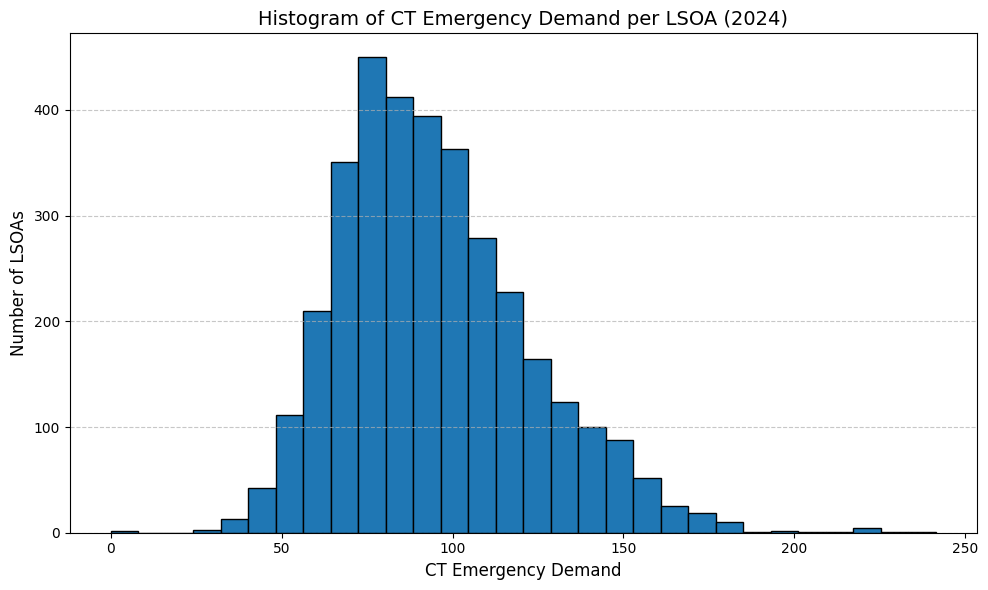

In [30]:
# ------------------------------------------------------------------
# Step 1a – Histogram of CT Emergency Demand per LSOA
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(ct_emergency_demand_df["ct_emergency_total_demand"], bins=30, edgecolor='black')

plt.title("Histogram of CT Emergency Demand per LSOA (2024)", fontsize=14)
plt.xlabel("CT Emergency Demand", fontsize=12)
plt.ylabel("Number of LSOAs", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


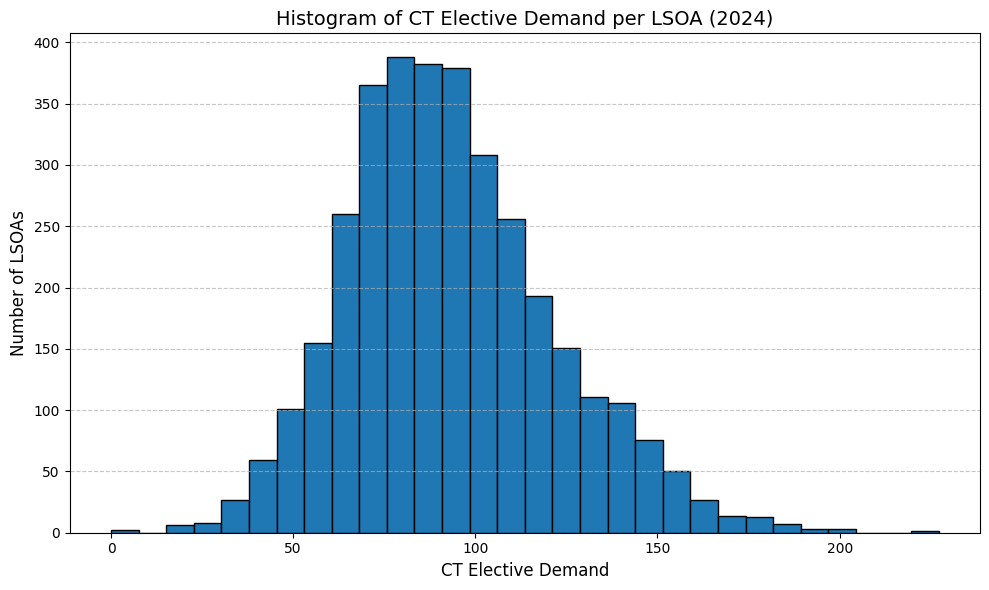

In [31]:
# ------------------------------------------------------------------
# Step 1b – Histogram of CT Elective Demand per LSOA
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(ct_elective_demand_df["ct_elective_total_demand"], bins=30, edgecolor='black')

plt.title("Histogram of CT Elective Demand per LSOA (2024)", fontsize=14)
plt.xlabel("CT Elective Demand", fontsize=12)
plt.ylabel("Number of LSOAs", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------------------------------------------
# Step 1b – Check for LSOAs with Zero or Very Low CT Emergency Demand
# ------------------------------------------------------------------
zero_demand_emergency = ct_emergency_demand_df[ct_emergency_demand_df["ct_emergency_total_demand"] == 0]
print(f"LSOAs with zero CT Emergency demand: {len(zero_demand_emergency)}")
print(zero_demand_emergency)

# Optional: Check for LSOAs with very low demand (e.g., < 5)
low_demand_emergency = ct_emergency_demand_df[ct_emergency_demand_df["ct_emergency_total_demand"] < 5]
print(f"\nLSOAs with very low CT Emergency demand (< 5): {len(low_demand_emergency)}")
print(low_demand_emergency)


In [ ]:
# ------------------------------------------------------------------
# Step 1c – Check for LSOAs with Zero or Very Low CT Elective Demand
# ------------------------------------------------------------------
zero_demand_elective = ct_elective_demand_df[ct_elective_demand_df["ct_elective_total_demand"] == 0]
print(f"LSOAs with zero CT Elective demand: {len(zero_demand_elective)}")
print(zero_demand_elective)

# Optional: Check for LSOAs with very low demand (e.g., < 5)
low_demand_elective = ct_elective_demand_df[ct_elective_demand_df["ct_elective_total_demand"] < 5]
print(f"\nLSOAs with very low CT Elective demand (< 5): {len(low_demand_elective)}")
print(low_demand_elective)


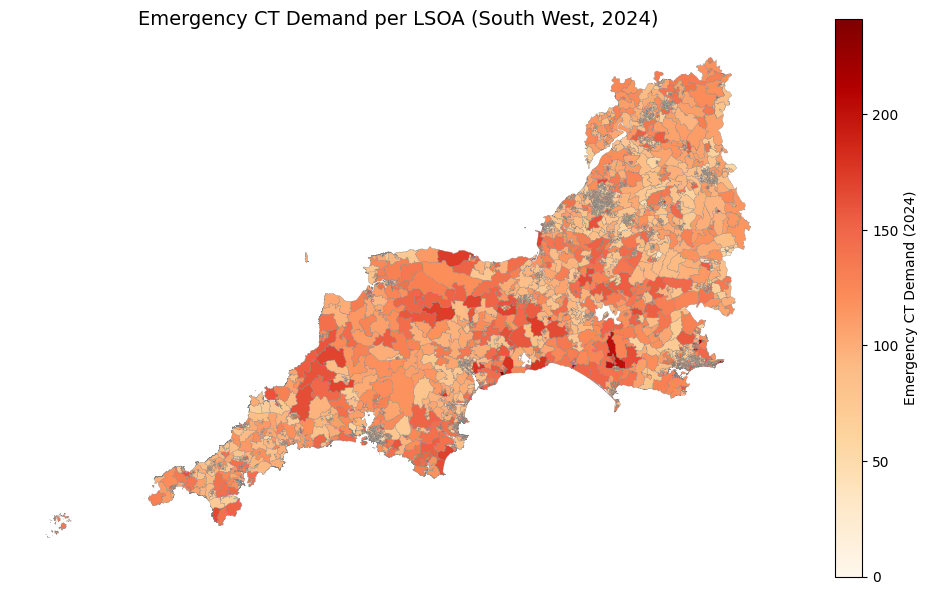

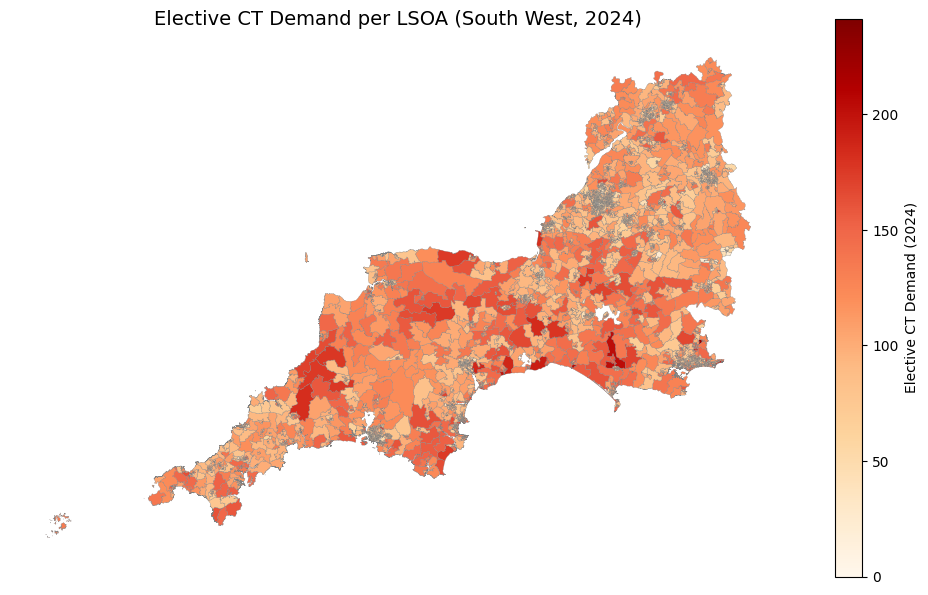

In [32]:
# ------------------------------------------------------------------
# Step 2 – Plot Emergency and Elective CT Demand (Same Scale)
# ------------------------------------------------------------------

import geopandas as gpd
import matplotlib.pyplot as plt

# Load base geometry
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)

# Merge emergency demand
gdf_emergency = gdf_geom.merge(
    ct_emergency_demand_df[["lsoa21cd", "ct_emergency_total_demand"]],
    on="lsoa21cd", how="left"
)

# Merge elective demand
gdf_elective = gdf_geom.merge(
    ct_elective_demand_df[["lsoa21cd", "ct_elective_total_demand"]],
    on="lsoa21cd", how="left"
)

# Determine shared maximum for consistent choropleth scaling
max_val = max(
    gdf_emergency["ct_emergency_total_demand"].max(),
    gdf_elective["ct_elective_total_demand"].max()
)

# Plot emergency CT demand
fig, ax = plt.subplots(figsize=(10, 6))
gdf_emergency.plot(
    column="ct_emergency_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Emergency CT Demand (2024)"},
    ax=ax,
    vmin=0,
    vmax=max_val
)
ax.set_title("Emergency CT Demand per LSOA (South West, 2024)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("ct_emergency_demand_choropleth_2024.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot elective CT demand
fig, ax = plt.subplots(figsize=(10, 6))
gdf_elective.plot(
    column="ct_elective_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Elective CT Demand (2024)"},
    ax=ax,
    vmin=0,
    vmax=max_val
)
ax.set_title("Elective CT Demand per LSOA (South West, 2024)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("ct_elective_demand_choropleth_2024.png", dpi=300, bbox_inches="tight")
plt.show()


In [33]:
# ------------------------------------------------------------------
# Step 3 – Compute Nearest Acute Hospital for Emergency CT Access
# ------------------------------------------------------------------

# --- 3.1 Load LSOA-to-LSOA Travel Matrix ---
travel_df = pd.read_csv(travel_csv_path, header=None)
travel_df.columns = [
    "origin_lsoa", "dest_lsoa", "car_travel_minutes",
    "placeholder_1", "placeholder_2"
]
travel_df["car_travel_minutes"] = pd.to_numeric(travel_df["car_travel_minutes"], errors="coerce")
travel_df["origin_lsoa"] = travel_df["origin_lsoa"].astype(str)
travel_df["dest_lsoa"] = travel_df["dest_lsoa"].astype(str)

# --- 3.2 Load Acute Sites and Clean ---
acute_df = pd.read_csv(acute_path)
acute_sites = (
    acute_df[["Name", "lsoa21cd"]]
    .dropna()
    .drop_duplicates()
    .assign(site_type="Acute")
)
acute_sites["lsoa21cd"] = acute_sites["lsoa21cd"].astype(str)

# --- 3.3 Identify Nearest Acute Site for Each LSOA ---
nearest_acute = (
    travel_df.merge(acute_sites, left_on="dest_lsoa", right_on="lsoa21cd", how="inner")
    .sort_values("car_travel_minutes")
    .groupby("origin_lsoa", as_index=False)
    .first()
    .rename(columns={
        "origin_lsoa": "lsoa21cd",
        "Name": "nearest_acute_site",
        "car_travel_minutes": "travel_to_acute_mins"
    })[["lsoa21cd", "nearest_acute_site", "travel_to_acute_mins"]]
)

# --- 3.4 Load LSOA Geometry ---
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)
ct_emergency_demand_df["lsoa21cd"] = ct_emergency_demand_df["lsoa21cd"].astype(str)

# --- 3.5 Merge Geometry with Emergency CT Demand ---
gdf_ct_emergency = gdf_geom.merge(
    ct_emergency_demand_df[["lsoa21cd", "ct_emergency_total_demand"]],
    on="lsoa21cd",
    how="left"
)

# --- 3.6 Merge with Nearest Acute Travel Time ---
gdf_ct_emergency = gdf_ct_emergency.loc[:, ~gdf_ct_emergency.columns.duplicated()]
nearest_acute = nearest_acute.loc[:, ~nearest_acute.columns.duplicated()]
nearest_acute["lsoa21cd"] = nearest_acute["lsoa21cd"].astype(str)

gdf_ct_emergency = gdf_ct_emergency.merge(nearest_acute, on="lsoa21cd", how="left")

# --- 3.7 Flag if Facility Is Onsite ---
facility_lsoas = set(acute_sites["lsoa21cd"])
gdf_ct_emergency["facility_onsite"] = gdf_ct_emergency["lsoa21cd"].isin(facility_lsoas)

# --- 3.8 Preview Output ---
gdf_ct_emergency[[
    "lsoa21cd", "ct_emergency_total_demand",
    "nearest_acute_site", "travel_to_acute_mins",
    "facility_onsite"
]].head()


,lsoa21cd,ct_emergency_total_demand,nearest_acute_site,travel_to_acute_mins,facility_onsite
0,E01020484,93.246507,Dorset County Hospital,50.094037,False
1,E01020481,109.547450,Dorset County Hospital,53.129856,False
2,E01020482,98.678892,Dorset County Hospital,50.757093,False
3,E01020479,125.300869,Dorset County Hospital,51.415206,False
4,E01020478,81.095187,Dorset County Hospital,49.825037,False


In [35]:
# ------------------------------------------------------------------
# Step 4 – Compute Nearest CDC for Elective CT Access
# ------------------------------------------------------------------

# --- 4.1 Load CDC Sites and Clean ---
cdc_df = pd.read_csv(cdc_path)
cdc_sites = (
    cdc_df[["Name", "lsoa21cd"]]
    .dropna()
    .drop_duplicates()
    .assign(site_type="CDC")
)
cdc_sites["lsoa21cd"] = cdc_sites["lsoa21cd"].astype(str)

# --- 4.2 Identify Nearest CDC Site for Each LSOA ---
nearest_cdc = (
    travel_df.merge(cdc_sites, left_on="dest_lsoa", right_on="lsoa21cd", how="inner")
    .sort_values("car_travel_minutes")
    .groupby("origin_lsoa", as_index=False)
    .first()
    .rename(columns={
        "origin_lsoa": "lsoa21cd",
        "Name": "nearest_cdc_site",
        "car_travel_minutes": "travel_to_cdc_mins"
    })[["lsoa21cd", "nearest_cdc_site", "travel_to_cdc_mins"]]
)

# --- 4.3 Load Geometry and Elective CT Demand ---
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)
ct_elective_demand_df["lsoa21cd"] = ct_elective_demand_df["lsoa21cd"].astype(str)

gdf_ct_elective = gdf_geom.merge(
    ct_elective_demand_df[["lsoa21cd", "ct_elective_total_demand"]],
    on="lsoa21cd",
    how="left"
)

# --- 4.4 Merge with Nearest CDC Info ---
nearest_cdc = nearest_cdc.loc[:, ~nearest_cdc.columns.duplicated()]
nearest_cdc["lsoa21cd"] = nearest_cdc["lsoa21cd"].astype(str)

gdf_ct_elective = gdf_ct_elective.merge(nearest_cdc, on="lsoa21cd", how="left")

# --- 4.5 Flag if CDC Facility Is Onsite ---
facility_lsoas_cdc = set(cdc_sites["lsoa21cd"])
gdf_ct_elective["cdc_onsite"] = gdf_ct_elective["lsoa21cd"].isin(facility_lsoas_cdc)

# --- 4.6 Preview Output ---
gdf_ct_elective[[
    "lsoa21cd", "ct_elective_total_demand",
    "nearest_cdc_site", "travel_to_cdc_mins",
    "cdc_onsite"
]].head()


,lsoa21cd,ct_elective_total_demand,nearest_cdc_site,travel_to_cdc_mins,cdc_onsite
0,E01020484,95.479103,Dorset Health Village Poole Beales CDC,37.262783,False
1,E01020481,112.413029,Dorset Health Village Poole Beales CDC,40.298602,False
2,E01020482,102.444857,Dorset Health Village Poole Beales CDC,37.925839,False
3,E01020479,105.850191,Dorset Health Village Poole Beales CDC,38.583952,False
4,E01020478,81.443184,Dorset Health Village Poole Beales CDC,36.993783,False


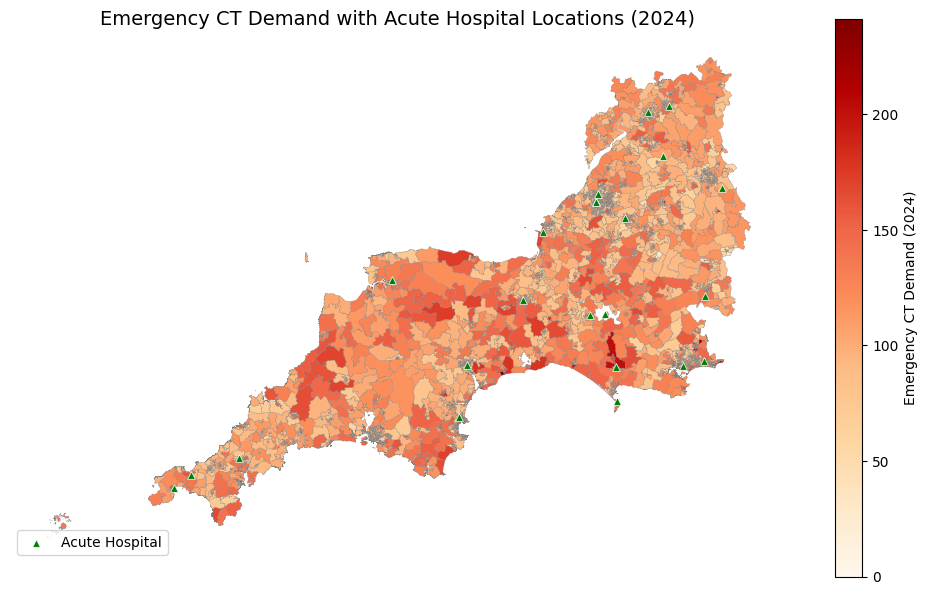

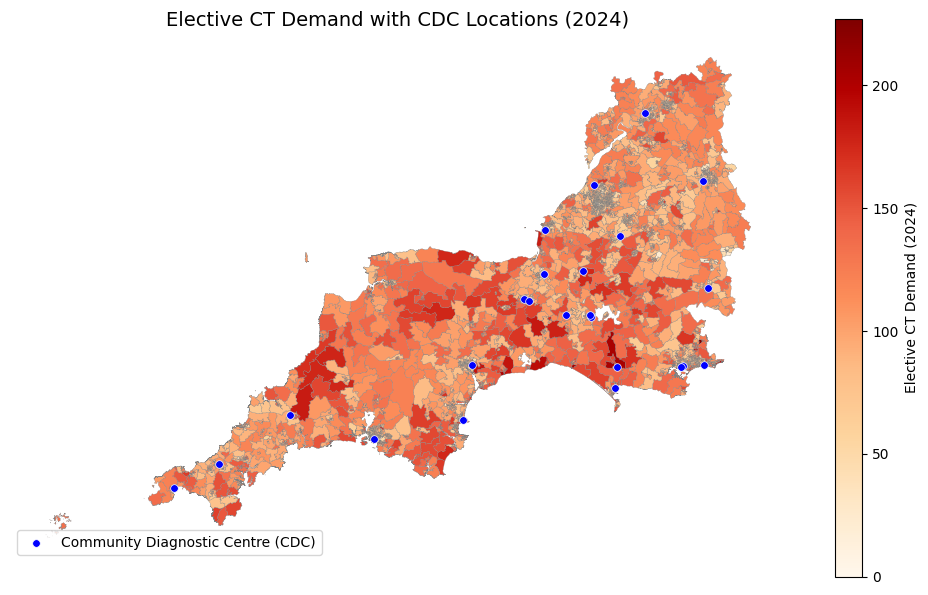

In [36]:
# ------------------------------------------------------------------
# Step 5 – Split Maps: Emergency and Elective CT Demand (2024)
# ------------------------------------------------------------------

# 5.1 – Prepare Geometry + Demand
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)
ct_emergency_demand_df["lsoa21cd"] = ct_emergency_demand_df["lsoa21cd"].astype(str)
ct_elective_demand_df["lsoa21cd"] = ct_elective_demand_df["lsoa21cd"].astype(str)

# Merge emergency and elective demand separately
gdf_emergency = gdf_geom.merge(
    ct_emergency_demand_df[["lsoa21cd", "ct_emergency_total_demand"]],
    on="lsoa21cd", how="left"
)
gdf_elective = gdf_geom.merge(
    ct_elective_demand_df[["lsoa21cd", "ct_elective_total_demand"]],
    on="lsoa21cd", how="left"
)

# 5.2 – Prepare Facility Geometry (reuse from Step 4 if exists)
facilities_gdf["centroid"] = facilities_gdf.geometry.centroid
facilities_gdf = facilities_gdf.set_geometry("centroid")

acute_gdf = facilities_gdf[facilities_gdf["site_type"] == "Acute"]
cdc_gdf = facilities_gdf[facilities_gdf["site_type"] == "CDC"]

# 5.3 – Emergency CT Demand with Acute Hospital Locations
fig1, ax1 = plt.subplots(figsize=(10, 6))
gdf_emergency.plot(
    column="ct_emergency_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={"label": "Emergency CT Demand (2024)"},
    ax=ax1
)
acute_gdf.plot(
    ax=ax1,
    color="green",
    marker="^",
    markersize=30,
    edgecolor="white",
    linewidth=0.5,
    label="Acute Hospital"
)
ax1.set_title("Emergency CT Demand with Acute Hospital Locations (2024)", fontsize=14)
ax1.axis("off")
ax1.legend(loc="lower left")
plt.tight_layout()
plt.savefig("ct_emergency_demand_with_acute_2024.png", dpi=300, bbox_inches="tight")
plt.show()

# 5.4 – Elective CT Demand with CDC Locations
fig2, ax2 = plt.subplots(figsize=(10, 6))
gdf_elective.plot(
    column="ct_elective_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={"label": "Elective CT Demand (2024)"},
    ax=ax2
)
cdc_gdf.plot(
    ax=ax2,
    color="blue",
    marker="o",
    markersize=30,
    edgecolor="white",
    linewidth=0.5,
    label="Community Diagnostic Centre (CDC)"
)
ax2.set_title("Elective CT Demand with CDC Locations (2024)", fontsize=14)
ax2.axis("off")
ax2.legend(loc="lower left")
plt.tight_layout()
plt.savefig("ct_elective_demand_with_cdcs_2024.png", dpi=300, bbox_inches="tight")
plt.show()


In [41]:
# Prepare Acute Catchments (Emergency CT)
catchment_acute = gdf_ct_emergency.dissolve(by="nearest_acute_site", as_index=False)
catchment_acute["site_type"] = "Acute"

# Prepare CDC Catchments (Elective CT)
catchment_cdc = gdf_ct_elective.dissolve(by="nearest_cdc_site", as_index=False)
catchment_cdc["site_type"] = "CDC"

# Prepare facility GeoDataFrame with centroids
facilities_df = pd.concat([
    cdc_df.assign(site_type="CDC"),
    acute_df.assign(site_type="Acute")
], ignore_index=True).dropna(subset=["lsoa21cd"]).drop_duplicates()

facilities_df["lsoa21cd"] = facilities_df["lsoa21cd"].astype(str)
facilities_gdf = facilities_df.merge(gdf_geom, on="lsoa21cd", how="left")
facilities_gdf = gpd.GeoDataFrame(facilities_gdf, geometry="geometry", crs=gdf_geom.crs)
facilities_gdf["centroid"] = facilities_gdf.geometry.centroid
facilities_gdf = facilities_gdf.set_geometry("centroid")

acute_gdf = facilities_gdf[facilities_gdf["site_type"] == "Acute"]
cdc_gdf = facilities_gdf[facilities_gdf["site_type"] == "CDC"]


/var/folders/sy/gz5gl6d91cbfwd2z85r62rbc0000gn/T/ipykernel_3996/671648125.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend(loc="lower left", frameon=True)


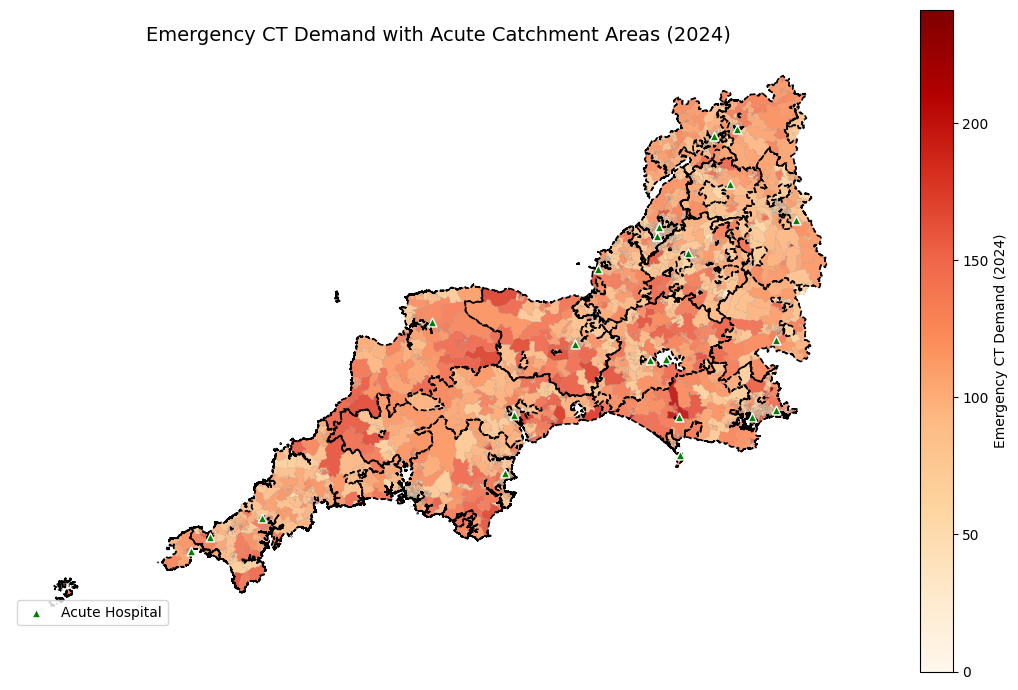

In [45]:
fig, ax1 = plt.subplots(figsize=(11, 7))

# Plot demand choropleth
gdf_ct_emergency.plot(
    column="ct_emergency_total_demand",
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Emergency CT Demand (2024)"},
    ax=ax1,
    alpha=0.9
)

# Catchment boundaries
catchment_acute.plot(
    ax=ax1,
    facecolor="none",
    edgecolor="black",
    linewidth=1.2,
    linestyle="--",
    label="Acute Catchment"
)

# Facility markers
acute_gdf.plot(
    ax=ax1,
    color="green",
    marker="^",
    markersize=40,
    edgecolor="white",
    label="Acute Hospital"
)

# Layout
ax1.set_title("Emergency CT Demand with Acute Catchment Areas (2024)", fontsize=14)
ax1.axis("off")
ax1.legend(loc="lower left", frameon=True)
plt.tight_layout()
plt.savefig("ct_emergency_demand_with_acute_catchments_2024.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/sy/gz5gl6d91cbfwd2z85r62rbc0000gn/T/ipykernel_3996/1188158236.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax2.legend(loc="lower left", frameon=True)


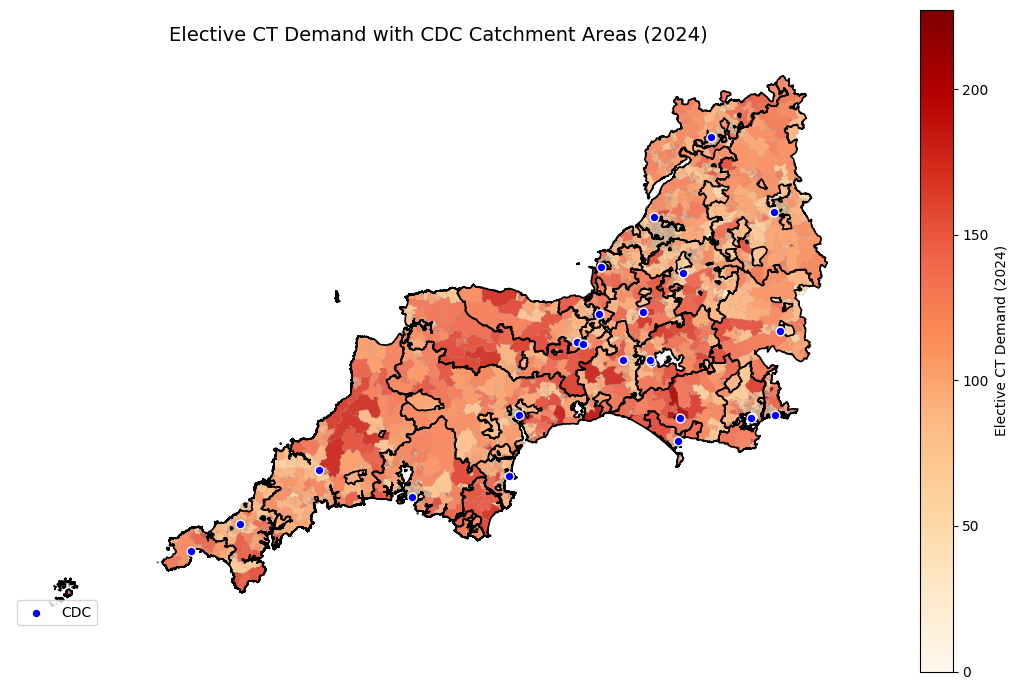

In [46]:
fig, ax2 = plt.subplots(figsize=(11, 7))

# Plot demand choropleth
gdf_ct_elective.plot(
    column="ct_elective_total_demand",
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Elective CT Demand (2024)"},
    ax=ax2,
    alpha=0.9
)

# Catchment boundaries
catchment_cdc.plot(
    ax=ax2,
    facecolor="none",
    edgecolor="black",
    linewidth=1.2,
    linestyle="-",
    label="CDC Catchment"
)

# Facility markers
cdc_gdf.plot(
    ax=ax2,
    color="blue",
    marker="o",
    markersize=40,
    edgecolor="white",
    label="CDC"
)

# Layout
ax2.set_title("Elective CT Demand with CDC Catchment Areas (2024)", fontsize=14)
ax2.axis("off")
ax2.legend(loc="lower left", frameon=True)
plt.tight_layout()
plt.savefig("ct_elective_demand_with_cdc_catchments_2024.png", dpi=300, bbox_inches="tight")
plt.show()
